In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
#data from https://wcc.sc.egov.usda.gov/nwcc/rgrpt?report=precsnotelmon&state=UT&operation=View
#Figure 4.1
#read the csv to pandas
snow = pd.read_csv("../data/snotel_wtr_yr_2020.csv")
#convert to cm
snow = snow.apply(lambda x: x*2.54 if x.name in ['TGL','BLP','BLT','FRM','PAR','TIM','PAY'] else x)
stns=list(snow)
print(stns[1:8])
snow


['TGL', 'BLP', 'BLT', 'FRM', 'PAR', 'TIM', 'PAY']


,YEAR,TGL,BLP,BLT,FRM,PAR,TIM,PAY
0,1981,88.900,100.838,67.818,86.614,70.612,85.598,52.832
1,1982,206.248,183.388,146.304,177.800,104.648,131.318,83.566
2,1983,140.208,212.344,145.034,165.354,104.648,124.968,88.646
3,1984,157.480,257.048,141.478,166.624,110.236,104.140,89.916
4,1985,112.776,143.256,102.616,118.872,89.154,111.760,72.390
5,1986,175.260,235.712,161.544,171.958,98.044,138.684,81.026
6,1987,74.676,119.634,87.122,74.930,59.436,63.246,57.912
7,1988,90.170,103.886,74.930,81.280,56.388,53.340,55.626
8,1989,126.746,131.826,100.076,119.126,78.740,70.612,51.816
9,1990,88.646,106.172,84.328,88.392,61.722,91.694,53.086


xm,ym: 102.33025 142.7099
xs,ys: 30.751218239892548 46.85592842309285


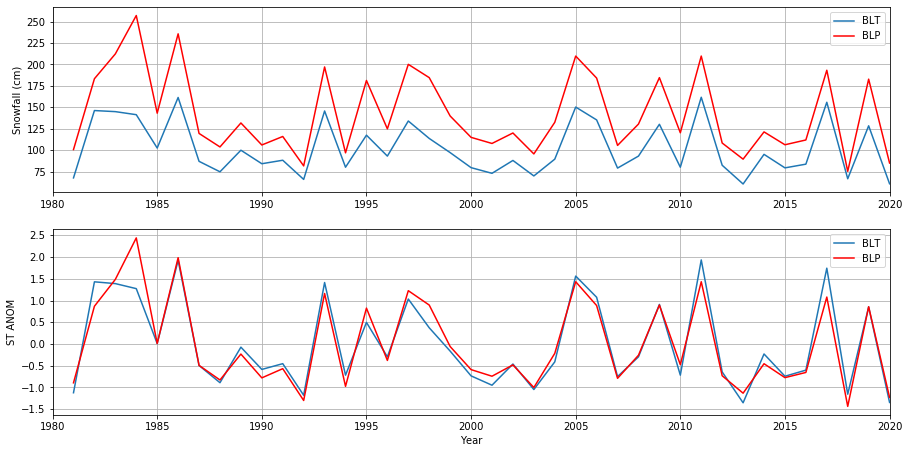

In [32]:
#plot totals
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(snow['YEAR'],snow['BLT'],label='BLT')
ax1.plot(snow['YEAR'],snow['BLP'],color='red',label='BLP')
ax1.set_ylabel('Snowfall (cm)')
ax1.set(xlim=(1980,2020))
ax1.grid()
ax1.legend()

#match notes - set BLT and BLP to x and y
x = snow['BLT']
y = snow['BLP']

#get means
xm = np.mean(x)
ym = np.mean(y)

#get st devs
xs = np.std(x)
ys = np.std(y)
print('xm,ym:',xm,ym)
print('xs,ys:',xs,ys)

#get anomalies
xprime = x - xm
yprime = y - ym

#standardize anomalies
xstar = xprime/xs
ystar = yprime/ys

#plot anomalies
ax2.plot(snow['YEAR'],xstar,label='BLT')
ax2.plot(snow['YEAR'],ystar,label='BLP',color='red')
ax2.legend()
ax2.set(xlim=(1980,2020))
ax2.grid()
ax2.set_ylabel('ST ANOM')
ax2.set_xlabel('Year')
plt.savefig('figure_4.2_2020.png')

In [33]:
#Brute force regression for two variables
covar_1 = 0
varx_1 = 0
vary_1 = 0
#n is number of years
n = len(snow)
for i in range(0,n):
    covar_1 = covar_1 + xprime[i]*yprime[i]
    varx_1 = varx_1 + xprime[i]*xprime[i]
    vary_1 = vary_1 + yprime[i]*yprime[i]

covar_1 = covar_1/n
varx_1 = varx_1/n
vary_1 = vary_1/n

b_1 = covar_1/varx_1
r_1 = covar_1/np.sqrt(varx_1*vary_1)
sdx_1 = np.sqrt(varx_1)
sdy_1 = np.sqrt(vary_1)

#using linear algebra
covar_2 = np.dot(xprime,yprime)
varx_2 = np.dot(xprime,xprime)
vary_2 = np.dot(yprime,yprime)
covar_2 = covar_2/n
varx_2 = varx_2/n
vary_2 = vary_2/n

b_2 = covar_2/varx_2
r_2 = covar_2/np.sqrt(varx_2*vary_2)
sdx_2 = np.sqrt(varx_2)
sdy_2 = np.sqrt(vary_2)
print('slopes',b_1,b_2)
print('correlations', r_1,r_2)
print('% explained variance',r_1*r_1*100)
print('% unexplained variance',100*(1-r_1*r_1))

slopes 1.4566903129837698 1.4566903129837703
correlations 0.9560156682419757 0.956015668241976
% explained variance 91.39659579241514
% unexplained variance 8.603404207584864


In [34]:
#use pandas
vals = snow[['BLP','BLT']]
#print(vals)
#Pearson correlation: not robust and reliant but most commonly used
r_pc= vals.corr(method='pearson')
print(r_pc)
#Spearman correlation: robust and reliant, sorts the values first and then compares
r_sc= vals.corr(method='spearman')
print(r_sc)

          BLP       BLT
BLP  1.000000  0.956016
BLT  0.956016  1.000000
         BLP      BLT
BLP  1.00000  0.96003
BLT  0.96003  1.00000


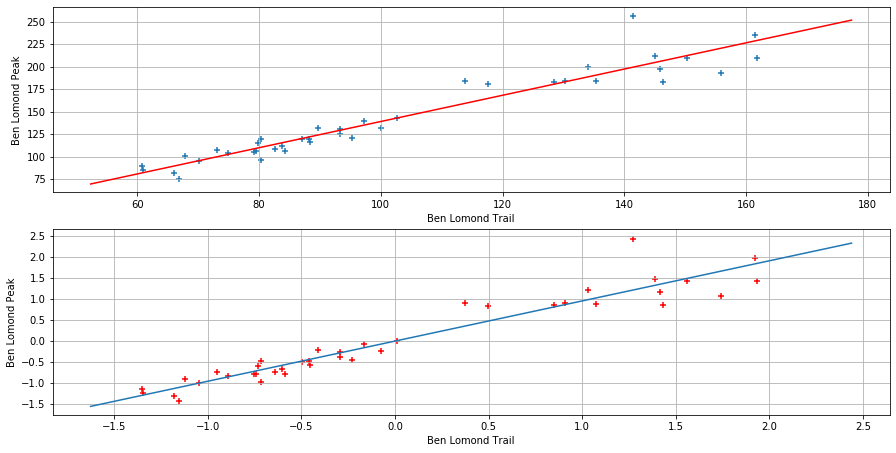

In [35]:
#compute estimate of y over range of x's
xhat = np.linspace(-50,75,100)
yhat = b_2*xhat

XH = xm+xhat
YH = ym+yhat
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.scatter(x,y,marker='+')
ax1.plot(XH,YH,color='red')
ax1.grid()
ax1.set_xlabel('Ben Lomond Trail')
ax1.set_ylabel('Ben Lomond Peak')
ax2.scatter(xstar,ystar,marker='+',color='red')
ax2.plot(xhat/xs,yhat/ys)
ax2.grid()
ax2.set_xlabel('Ben Lomond Trail')
ax2.set_ylabel('Ben Lomond Peak')
plt.savefig('figure_4.3_2020.png')

              sin           cos
sin  1.000000e+00  6.444603e-17
cos  6.444603e-17  1.000000e+00
          sin       cos
sin  1.000000  0.003858
cos  0.003858  1.000000
       amp_1  amp_2
amp_1    1.0   -1.0
amp_2   -1.0    1.0
       amp_1  amp_2
amp_1    1.0   -1.0
amp_2   -1.0    1.0


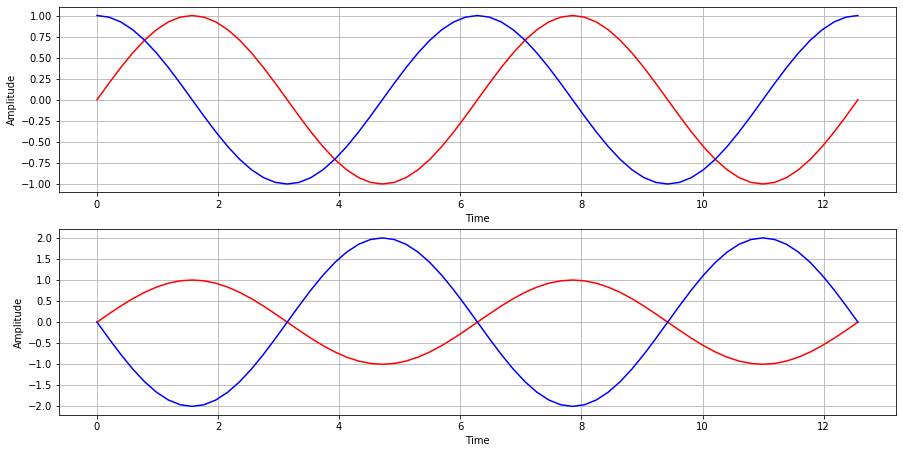

In [36]:
# show that two time series in quadrature in time (out of phase by 90 degrees) 
# have a linear correlation of zero
time = np.arange(0, 4 * np.pi+np.pi/16, np.pi/16.);
amp_sin_1 = np.sin(time)
amp_cos_1 = np.cos(time)

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7.5))
ax1.plot(time,amp_sin_1,color='red')
ax1.plot(time,amp_cos_1,color='blue')
ax1.grid()
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

amp_vals_1 = pd.DataFrame()
amp_vals_1['sin'] = amp_sin_1
amp_vals_1['cos'] = amp_cos_1
#print(amp_vals_1)

#Pearson correlation: not robust and reliant but most commonly used
#note that in the 2x2 matrix returned, the diagonal values are 1
# as those are the correlations with the same time series
# and the off diagonal elements are the same and the correlations
# between the two different time series
r_pc_amp_1= amp_vals_1.corr(method='pearson')
print(r_pc_amp_1)
#Spearman correlation: robust and reliant, sorts the values first and then compares
r_sc_amp_1= amp_vals_1.corr(method='spearman')
print(r_sc_amp_1)

# show that two time series in phase with very different amplitudes
# have a linear correlation of one
amp_sin_2 = -2*np.sin(time)

ax2.plot(time,amp_sin_1,color='red')
ax2.plot(time,amp_sin_2,color='blue')
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

amp_vals_2 = pd.DataFrame()
amp_vals_2['amp_1'] = amp_sin_1
amp_vals_2['amp_2'] = amp_sin_2
#print(amp_vals_2)
#Pearson correlation: not robust and reliant but most commonly used
r_pc_amp_2= amp_vals_2.corr(method='pearson')
print(r_pc_amp_2)
#Spearman correlation: robust and reliant, sorts the values first and then compares
r_sc_amp_2= amp_vals_2.corr(method='spearman')
print(r_sc_amp_2)

plt.savefig('figure_4.4_2020.png')



means TGL    119.40540
BLP    142.70990
BLT    102.33025
FRM    124.18060
PAR     80.42910
TIM     90.03030
PAY     63.38570
dtype: float64
stds TGL    32.486084
BLP    46.855928
BLT    30.751218
FRM    33.055092
PAR    17.129334
TIM    28.413732
PAY    15.241900
dtype: float64


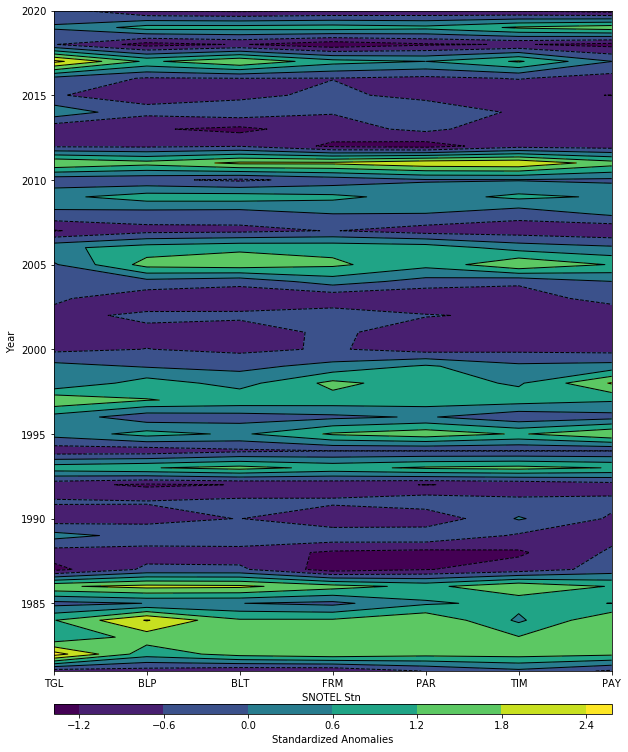

In [37]:
#Figure 4.5 - hovmuller diagram of standardized temporal anomalies

#create dataframe without the year column
xt = snow.drop('YEAR',axis=1)
xtm = xt.mean(axis=0)
xts = np.std(xt)
print ('means',xtm)
print('stds',xts)

no=7
# fill dataframe with anomalies
xtp = pd.DataFrame()
for col in list(xt.columns):
    xtp[col] = xt[col].apply(lambda x : x - xtm[col])

#fill dataframe with standardized anomalies
xstar  = pd.DataFrame()
for col in list(xtp.columns):
    xstar[col] = xtp[col].apply(lambda x : x/xts[col])

fig,ax = plt.subplots(figsize=(10,15))
#ax.invert_yaxis()

cf = ax.contourf(np.arange(1,no+1,1),snow['YEAR'],xstar,extend='both')
cs = ax.contour(np.arange(1,no+1,1),snow['YEAR'],xstar,colors='k', linewidths=1)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)
ax.set_xticks(np.arange(1,8))
ax.set_xticklabels(stns[1:8])
ax.set_xlabel('SNOTEL Stn ')
ax.set_ylabel('Year')
cbar.set_label('Standardized Anomalies')
plt.savefig('figure_4.5_2020.png')

          TGL       BLP       BLT       FRM       PAR       TIM       PAY
TGL  1.000000  0.777492  0.846904  0.780885  0.785076  0.761116  0.633736
BLP  0.777492  1.000000  0.956016  0.925140  0.901164  0.881794  0.886435
BLT  0.846904  0.956016  1.000000  0.914687  0.881041  0.923141  0.824524
FRM  0.780885  0.925140  0.914687  1.000000  0.946443  0.887852  0.877782
PAR  0.785076  0.901164  0.881041  0.946443  1.000000  0.893228  0.890707
TIM  0.761116  0.881794  0.923141  0.887852  0.893228  1.000000  0.869179
PAY  0.633736  0.886435  0.824524  0.877782  0.890707  0.869179  1.000000


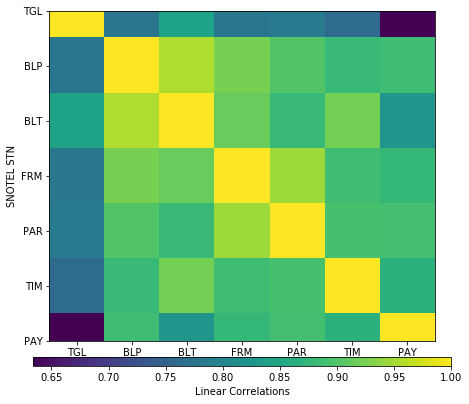

In [38]:
#compute correlation between each time series (don't need to use anomalies or std anomalies)
cors=xt.corr()
print(cors)
fig,ax = plt.subplots(figsize=(7.5,7.5))
cf = ax.imshow(cors)
ax.set_xticks(np.arange(0,7))
ax.set_yticks(np.arange(0,7))
ax.set_xticklabels(stns[1:8])
ax.set_yticklabels(stns[1:8])
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.04, aspect=50, extendrect=True)

#ax.set_xlabel('SNOTEL STN')
ax.set_ylabel('SNOTEL STN')

cbar.set_label('Linear Correlations')
plt.savefig('figure_4.6_2020.png')

In [39]:
#cross validation using skikit-learn modules
import sklearn.linear_model as skl_lm
import sklearn.metrics as skl_met 
import sklearn.model_selection as skl_sel 

In [40]:
#get the TGL and PAY time series
x = snow['TGL'].values.reshape(-1,1)
y = snow['PAY']
t = snow['YEAR']

In [41]:
#compute rmse test metric using the entire data set for reference
#introduce coefficient of determination as a means of the usefulness of the prediction
#for the test metric
#create a linear regression object
lm_all = skl_lm.LinearRegression()
#fit linearly using the entire data set
n_tot = len(y)
print('total number of years',n_tot)
lm_all.fit(x,y)
# Estimate using the entire data set. 
y_est_all = lm_all.predict(x)
rmse_all = np.sqrt(skl_met.mean_squared_error(y, y_est_all))
print('root mean squared error: %.2f'% rmse_all)
#coefficient of determination is a measure of the "goodness of the fit"
# The coefficient of determination: 1 is perfect prediction. 0 Awful. Can be negative meaning even worse
print('Coefficient of determination: %.2f' % skl_met.r2_score(y, y_est_all))

total number of years 40
root mean squared error: 11.79
Coefficient of determination: 0.40


In [42]:
#split the time series up into two samples. In this case of 50% in the training data set, 50% in the testing set
X_train, X_test, y_train, y_test = skl_sel.train_test_split(x, y, train_size=0.5, random_state=1)
n_train = len(y_train)
n_test = len(y_test)
print('total number of years in training and test data sets',n_train,n_test)
#create another regression object
lm = skl_lm.LinearRegression()
#fit linearly using the training data set
lm.fit(X_train,y_train)
# Estimate using the test data set 
y_est = lm.predict(X_test)
rmse = np.sqrt(skl_met.mean_squared_error(y_test, y_est))
print('root mean squared error: %.2f'% rmse)
# The coefficient of determination: 1 is perfect prediction. 0 Awful. Can be negative meaning even worse
print('Coefficient of determination: %.2f' % skl_met.r2_score(y_test, y_est))

total number of years in training and test data sets 20 20
root mean squared error: 13.77
Coefficient of determination: 0.32


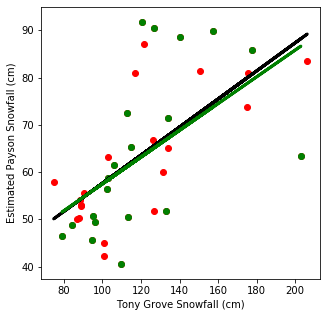

In [43]:
# Plot outputs
fig,ax = plt.subplots(figsize=(5,5))
#plot all the values
plt.scatter(x,y,color='red')
#linear estimate based on entire data set
plt.plot(x, y_est_all, color='black', linewidth=3)
#overwrite independent cases
plt.scatter(X_test, y_test,  color='green')
#linear estimate based on the training data set
plt.plot(X_test, y_est, color='green', linewidth=3)
ax.set_xlabel('Tony Grove Snowfall (cm)')
ax.set_ylabel('Estimated Payson Snowfall (cm)')
plt.savefig('figure_4.12_2020.png')